In this notebook, I want to compare different approaches to image segmentation on a simple everyday example. I am thinking of using a photograph of lemons (or strawberries), process the image in black and white and apply various algorithm, from simple to complicated, and comment on the result. For each segmetnation, I would need a list of procs and cons, so that each next method is more sophisticated, more efficient, more exact, but also more time-consuming.

Normalize the images by centering around orange.

In [7]:
import skimage as sk
from skimage import io

In [104]:
%matplotlib inline

In [2]:
# sk? this command lists all skimage modules with a short explanation on what they do. Include in the talk.

In [13]:
import libjpeg

ImportError: No module named libjpeg

In [74]:
img = io.imread('../images/robot1.png')

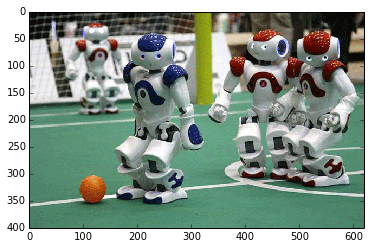

In [10]:
io.imshow(img)

In [145]:
from skimage import filters
from skimage import color, img_as_float
import numpy as np

In [214]:
def plot(im, colormap='gray'):
    import matplotlib.pyplot as plt
    plt.set_cmap(colormap)
    
    if im is not None:
        io.imshow(im)

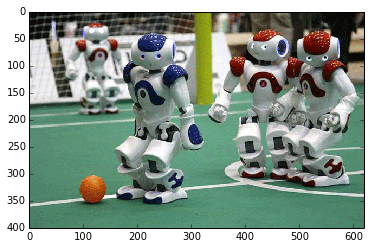

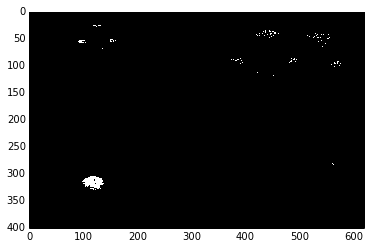

In [220]:
def is_orange(voxel):
    """
    This function returns true if the voxel is in the orange interval.
    """
    rgb = (1, .45, 0.3)
    tolerance = .25
    rgb_min = [max(item-tolerance, 0) for item in rgb]
    rgb_max = [min(item+tolerance, 1) for item in rgb]
    return all([rgb_min[index] <= item <= rgb_max[index] for index, item in enumerate(voxel)])

def read_image(name):
    return img_as_float(io.imread('../images/%s' % name))

def filter_orange(_image):
    """
    Filters the image for voxels in the orange interval only.
    """
    res = np.zeros(_image.shape[:2])
    for row_index, row in enumerate(_image):
        for col_index, voxel in enumerate(row):
            res[row_index, col_index] = is_orange(voxel)

    return res

for image in ['robot1.png', 'robot2.png', 'robot3.png']:
    img = read_image(image)
    plot(img)
    ball_mask = filter_orange(img)
    plot(ball_mask, colormap='hot')